# Project - Predicting Arrests in Chicago

- Ankita Tripathy
- Fabrizio Petrozzi Yanez
- Muhamamd Hammaz
- Priyanka Jammu
- Sai praneetha Sigharam
- Subham Mohanty

# Problem Statement

#### The Chicago Police Department struggles with limited resources, impacting its ability to address crime and ensure public safety effectively. Optimizing resource allocation and leveraging data-driven strategies are critical to improving operational efficiency and community outcomes.

## OBJECTIVE
- Identifying patterns related to arrests within historical crime records.
- Developing predictive models to classify incidents as resulting in an arrest or not.
- Assessing the performance of these models to identify the most effective approach for the task.
    
By accomplishing these goals, law enforcement agencies can enhance their ability to prioritize cases and allocate resources more efficiently.

# Data Source

The data is taken from <b>Chicago data portal</b> <br>
<b>Main Crime Data Source</b> - https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present-Map/ahwe-kpsy <br>
<b>Description</b> - This dataset contains crime records from Chicago, providing details such as crime type, location, time, and whether an arrest was made. It includes 22 attributes and 220,408 records, with arrest as the target variable for predictive modeling.

<b>Community Data Source</b> -https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

# Importing the packages

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

# Importing the data

In [131]:
# Importing the crime data
crime_data=pd.read_csv("~/Downloads/crimes2.csv")
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13657357,JH500543,11/06/2024 12:00:00 AM,016XX W 16TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,25,31.0,11,1165650.0,1892129.0,2024,11/13/2024 03:41:09 PM,41.859592,-87.667426,POINT (-87.667425669 41.859592422)
1,13655005,JH497638,11/06/2024 12:00:00 AM,066XX S WOODLAWN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20,42.0,08B,1185357.0,1861236.0,2024,11/13/2024 03:41:09 PM,41.774378,-87.596061,POINT (-87.59606101 41.774377718)
2,13655328,JH497783,11/06/2024 12:00:00 AM,040XX W POLK ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,24,26.0,05,1149648.0,1896141.0,2024,11/13/2024 03:41:09 PM,41.870927,-87.726060,POINT (-87.726060463 41.870927379)
3,13655636,JH498312,11/06/2024 12:00:00 AM,019XX S HOMAN AVE,0760,BURGLARY,BURGLARY FROM MOTOR VEHICLE,STREET,False,False,...,24,29.0,06,1154007.0,1890273.0,2024,11/13/2024 03:41:09 PM,41.854739,-87.710213,POINT (-87.710213289 41.854739195)
4,13655472,JH497835,11/06/2024 12:00:00 AM,023XX N KEDVALE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,35,20.0,26,1148328.0,1915262.0,2024,11/13/2024 03:41:09 PM,41.923423,-87.730413,POINT (-87.730413365 41.923422944)


 <b>To obtain community names, we are loading the community data and mapping it to the crime dataset based on the community area number.<b>

In [133]:
#Importing the community data
community_df=pd.read_csv("~/Downloads/Community_Areas.csv")[['AREA_NUMBE','COMMUNITY']]
community_df.head()

,AREA_NUMBE,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD


# Data Characteristics

In [135]:
# shape of data
print("Chicago Crime Dataset:", crime_data.shape[0], "rows,", crime_data.shape[1], "columns")


Chicago Crime Dataset: 220408 rows, 22 columns


In [136]:
# Checking the columns and its datatypes
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220408 entries, 0 to 220407
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    220408 non-null  int64  
 1   Case Number           220408 non-null  object 
 2   Date                  220408 non-null  object 
 3   Block                 220408 non-null  object 
 4   IUCR                  220408 non-null  object 
 5   Primary Type          220408 non-null  object 
 6   Description           220408 non-null  object 
 7   Location Description  219552 non-null  object 
 8   Arrest                220408 non-null  bool   
 9   Domestic              220408 non-null  bool   
 10  Beat                  220408 non-null  int64  
 11  District              220408 non-null  int64  
 12  Ward                  220408 non-null  int64  
 13  Community Area        220407 non-null  float64
 14  FBI Code              220408 non-null  object 
 15  

<b> Description of features: </b>

- ID: Unique identifier for the crime record.
- Case Number: Unique Chicago Police Department record ID.
- Date: Timestamp indicating when the crime occurred.
- Block: Partially redacted address of the crime location.
- IUCR & Primary Type: Illinois Uniform Crime Reporting code and general classification of the crime (e.g., THEFT, BATTERY).
- Description: Detailed subcategory of the crime.
- Location Description: Type of location where the crime occurred (e.g., street, park).
- Arrest & Domestic: Flags indicating if an arrest was made or if the incident was domestic-related.
- Beat & District: Police geographic areas (beat and district) where the crime occurred.
- Ward & Community Area: City council district and community area of the crime.
- FBI Code: FBI classification of the crime type.
- Coordinates: X, Y, latitude, and longitude of the crime location (shifted for privacy).
- Year & Updated On: Year of the crime and the last update to the record.
- Location: Combined latitude and longitude for mapping.


In [138]:
# changing date into datetime type
crime_data['Date'] = pd.to_datetime(crime_data['Date'])
crime_data['Updated On'] = pd.to_datetime(crime_data['Updated On'])

In [139]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220408 entries, 0 to 220407
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    220408 non-null  int64         
 1   Case Number           220408 non-null  object        
 2   Date                  220408 non-null  datetime64[ns]
 3   Block                 220408 non-null  object        
 4   IUCR                  220408 non-null  object        
 5   Primary Type          220408 non-null  object        
 6   Description           220408 non-null  object        
 7   Location Description  219552 non-null  object        
 8   Arrest                220408 non-null  bool          
 9   Domestic              220408 non-null  bool          
 10  Beat                  220408 non-null  int64         
 11  District              220408 non-null  int64         
 12  Ward                  220408 non-null  int64         
 13 

In [140]:
# Community data shape
print("Community Area Dataset:", community_df.shape[0], "rows,", community_df.shape[1], "columns")


Community Area Dataset: 77 rows, 2 columns


In [141]:
# Checking the columns and its datatypes
community_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AREA_NUMBE  77 non-null     int64 
 1   COMMUNITY   77 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


<b> Description of features: </b>

- AREA_NUMBE: Represents the unique identifier for each community area.
- COMMUNITY: Name of the corresponding community area.

In [143]:
# Merging on different column names
# chicago_crime_data is Final Dataset 
chicago_crime_data = crime_data.merge(community_df, left_on='Community Area', right_on='AREA_NUMBE', how='inner')
chicago_crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,AREA_NUMBE,COMMUNITY
0,13657357,JH500543,2024-11-06,016XX W 16TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,11,1165650.0,1892129.0,2024,2024-11-13 15:41:09,41.859592,-87.667426,POINT (-87.667425669 41.859592422),31,LOWER WEST SIDE
1,13655005,JH497638,2024-11-06,066XX S WOODLAWN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,08B,1185357.0,1861236.0,2024,2024-11-13 15:41:09,41.774378,-87.596061,POINT (-87.59606101 41.774377718),42,WOODLAWN
2,13655328,JH497783,2024-11-06,040XX W POLK ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,05,1149648.0,1896141.0,2024,2024-11-13 15:41:09,41.870927,-87.726060,POINT (-87.726060463 41.870927379),26,WEST GARFIELD PARK
3,13655636,JH498312,2024-11-06,019XX S HOMAN AVE,0760,BURGLARY,BURGLARY FROM MOTOR VEHICLE,STREET,False,False,...,06,1154007.0,1890273.0,2024,2024-11-13 15:41:09,41.854739,-87.710213,POINT (-87.710213289 41.854739195),29,NORTH LAWNDALE
4,13655472,JH497835,2024-11-06,023XX N KEDVALE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,26,1148328.0,1915262.0,2024,2024-11-13 15:41:09,41.923423,-87.730413,POINT (-87.730413365 41.923422944),20,HERMOSA


In [144]:
# shape of merged data
print("Chicago Crime Dataset:", chicago_crime_data.shape[0], "rows,", chicago_crime_data.shape[1], "columns")

Chicago Crime Dataset: 220407 rows, 24 columns


# Exploratory Data Analysis

### Checking for Nulls

In [147]:
chicago_crime_data.isna().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    856
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate            105
Y Coordinate            105
Year                      0
Updated On                0
Latitude                105
Longitude               105
Location                105
AREA_NUMBE                0
COMMUNITY                 0
dtype: int64

From this data, we can conclude the percentage of missing data is less than 1%. So I'm going ahead and dropping them

In [149]:
chicago_crime_data=chicago_crime_data.dropna(subset=['Location Description','Location'])
# shape after dropping
print("Chicago Crime Dataset:", chicago_crime_data.shape[0], "rows,", chicago_crime_data.shape[1], "columns")

Chicago Crime Dataset: 219448 rows, 24 columns


In [150]:
# checking null values after dropping
chicago_crime_data.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
AREA_NUMBE              0
COMMUNITY               0
dtype: int64

In [151]:
# Splitting categorical and numerical columns

cat_columns = chicago_crime_data.select_dtypes(include=['object']).columns.to_list()
num_columns = chicago_crime_data.select_dtypes(exclude=['object']).columns.to_list()

print("Categorical Columns in the data:\n ", cat_columns)
print("\n")
print("Numerical Columns in the data: \n", num_columns)

Categorical Columns in the data:
  ['Case Number', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'FBI Code', 'Location', 'COMMUNITY']


Numerical Columns in the data: 
 ['ID', 'Date', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'AREA_NUMBE']


In [152]:
chicago_crime_data.duplicated().sum()

0

There are no duplicates.

<b>The simplify_primary_type function categorizes specific crime types into broader categories like "THEFT_OR_ROBBERY" or "BATTERY_OR_ASSAULT" to enable easier analysis and grouping of similar crimes.<b>

In [155]:
def simplify_primary_type(pt):
    if "THEFT" in pt or "ROBBERY" in pt:
        return "THEFT_OR_ROBBERY"
    elif "BATTERY" in pt or "ASSAULT" in pt:
        return "BATTERY_OR_ASSAULT"
    elif "BURGLARY" in pt or "TRESPASS" in pt or "CRIMINAL DAMAGE" in pt:
        return "BURGLARY_OR_TRESPASS"
    elif "FRAUD" in pt or "DECEPTIVE" in pt:
        return "FRAUD_OR_DECEPTIVE"
    elif "WEAPON" in pt:
        return "WEAPONS_VIOLATION"
    elif "NARCOTIC" in pt or "DRUG" in pt or "OTHER NARCOTIC VIOLATION" in pt:
        return "NARCOTICS"
    elif "CHILDREN" in pt or "OFFENSE INVOLVING CHILDREN" in pt:
        return "OFFENSE_INVOLVING_CHILDREN"
    elif "SEX" in pt or "PROSTITUTION" in pt or "PUBLIC INDECENCY" in pt:
        return "SEX_OFFENSE"
    elif "PEACE VIOLATION" in pt:
        return "PUBLIC_PEACE_VIOLATION"
    elif "INTERFERENCE" in pt or "PUBLIC OFFICER" in pt:
        return "INTERFERENCE_WITH_PUBLIC_OFFICER"
    elif "HOMICIDE" in pt:
        return "HOMICIDE"
    elif "STALKING" in pt:
        return "STALKING"
    elif "ARSON" in pt:
        return "ARSON"
    elif "LIQUOR LAW" in pt:
        return "LIQUOR_LAW_VIOLATION"
    elif "INTIMIDATION" in pt:
        return "INTIMIDATION"
    elif "KIDNAPPING" in pt:
        return "KIDNAPPING"
    elif "OBSCENITY" in pt:
        return "OBSCENITY"
    elif "GAMBLING" in pt:
        return "GAMBLING"
    elif "TRAFFICKING" in pt:
        return "HUMAN_TRAFFICKING"
    elif "NON-CRIMINAL" in pt:
        return "NON_CRIMINAL"
    else:
        return "OTHER_OFFENSE"

# Apply the updated function to the Primary Type column
chicago_crime_data['Primary Type'] = chicago_crime_data['Primary Type'].apply(simplify_primary_type)
# Remove rows with "NON_CRIMINAL" or "OTHER_OFFENSE"
chicago_crime_data = chicago_crime_data[
    ~chicago_crime_data['Primary Type'].isin(["NON_CRIMINAL", "OTHER_OFFENSE"])
]

# Verify the updated counts for Primary Type
print(chicago_crime_data['Primary Type'].value_counts())


Primary Type
THEFT_OR_ROBBERY                    78025
BATTERY_OR_ASSAULT                  61276
BURGLARY_OR_TRESPASS                35662
FRAUD_OR_DECEPTIVE                  11936
WEAPONS_VIOLATION                    7020
NARCOTICS                            4932
OFFENSE_INVOLVING_CHILDREN           1421
SEX_OFFENSE                          1308
PUBLIC_PEACE_VIOLATION                872
INTERFERENCE_WITH_PUBLIC_OFFICER      586
HOMICIDE                              510
STALKING                              427
ARSON                                 419
LIQUOR_LAW_VIOLATION                  168
INTIMIDATION                          142
KIDNAPPING                             75
OBSCENITY                              48
GAMBLING                               19
HUMAN_TRAFFICKING                       2
Name: count, dtype: int64


### Analyzing Data

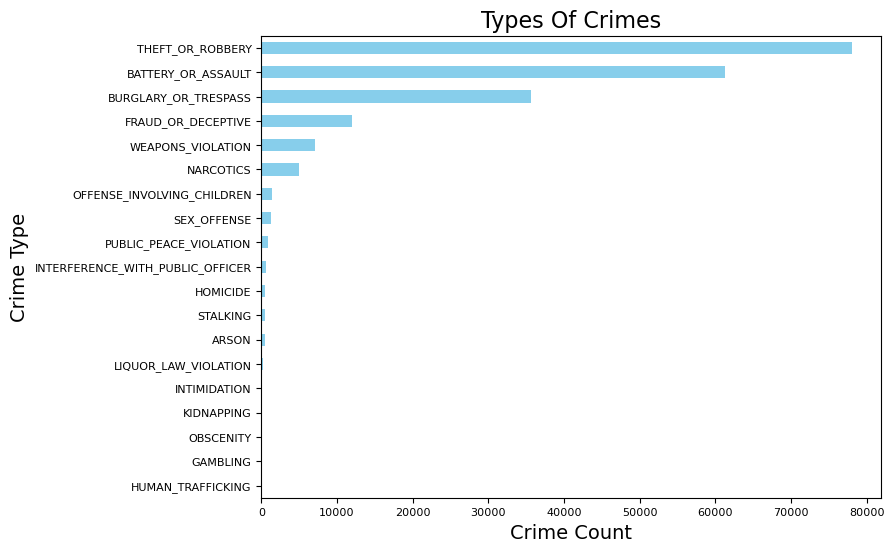

In [157]:
import matplotlib.pyplot as plt
community_crime_counts = chicago_crime_data['Primary Type'].value_counts()
# Increase the figure size and adjust font size
plt.figure(figsize=(8, 6))  # Adjust height for more spacing
community_crime_counts.plot(kind='barh', color='skyblue')
plt.title('Types Of Crimes', fontsize=16)
plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()  # Invert y-axis to show highest counts at the top
plt.show()


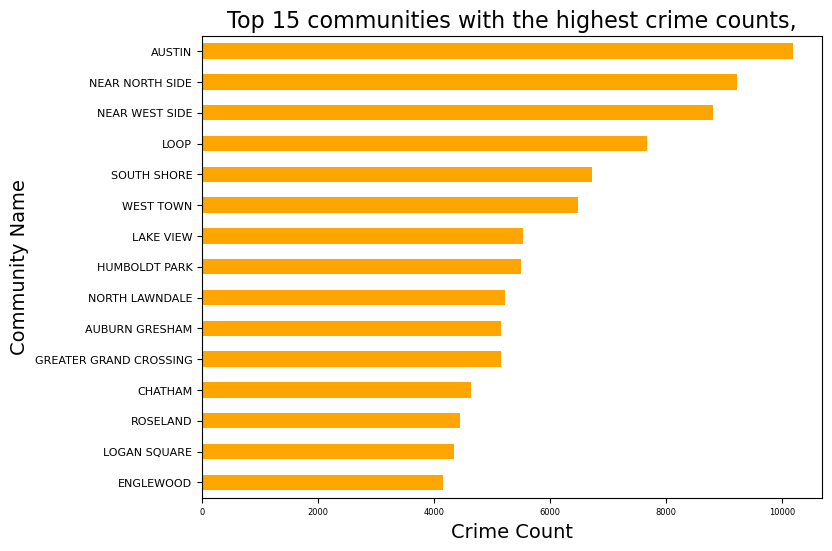

In [158]:
import matplotlib.pyplot as plt
community_crime_counts = chicago_crime_data['COMMUNITY'].value_counts().sort_values(ascending=False).head(15)
# Increase the figure size and adjust font size
plt.figure(figsize=(8, 6))  # Adjust height for more spacing
community_crime_counts.plot(kind='barh', color='orange')
plt.title('Top 15 communities with the highest crime counts,', fontsize=16)
plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('Community Name', fontsize=14)
plt.xticks(fontsize=6)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()  # Invert y-axis to show highest counts at the top
plt.show()


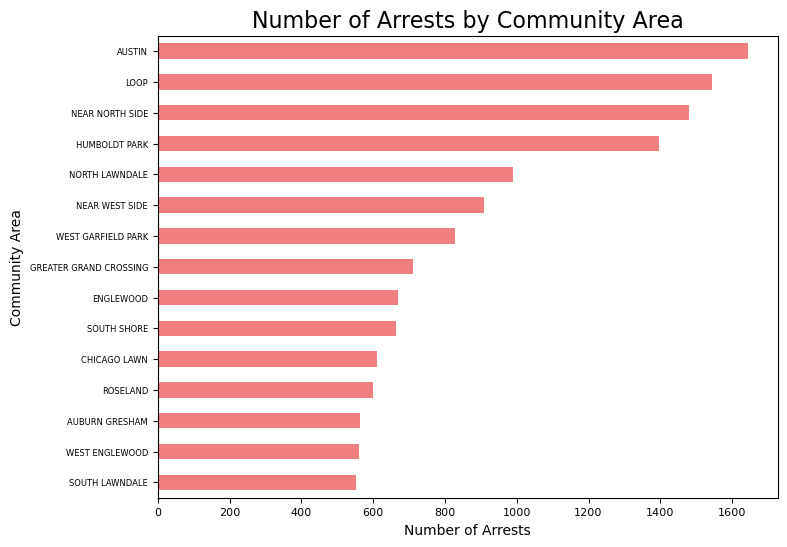

In [159]:

# Group by 'COMMUNITY' and count arrests
arrest_counts_by_community = chicago_crime_data.groupby('COMMUNITY')['Arrest'].sum().sort_values(ascending=False).head(15)

# Plotting the data
plt.figure(figsize=(8,6))  # Adjust height to fit all communities
arrest_counts_by_community.plot(kind='barh', color='lightcoral')
plt.title('Number of Arrests by Community Area', fontsize=16)
plt.xlabel('Number of Arrests', fontsize=10)
plt.ylabel('Community Area', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=6)
plt.gca().invert_yaxis()  # Show highest counts at the top
plt.show()


In [160]:
# Count the True and False values in the 'Arrest' column
arrest_counts = chicago_crime_data['Arrest'].value_counts()
arrest_counts

Arrest
False    178627
True      26221
Name: count, dtype: int64

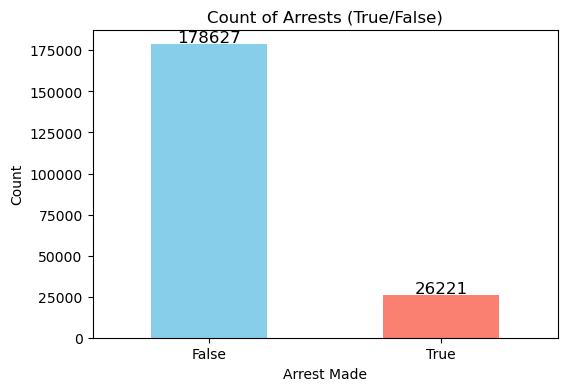

In [161]:
# Plotting the bar graph
plt.figure(figsize=(6, 4))
arrest_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Arrests (True/False)')
plt.xlabel('Arrest Made')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)  # Set labels for clarity

# Adding data labels on top of each bar
for index, value in enumerate(arrest_counts):
    plt.text(index, value + 1000, str(value), ha='center', fontsize=12)  # Adjusting height for readability

plt.show()


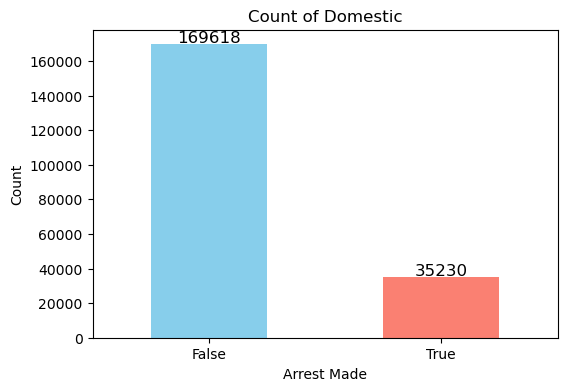

In [162]:
import matplotlib.pyplot as plt

# Count the True and False values in the 'Arrest' column
arrest_counts = chicago_crime_data['Domestic'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(6,4))
arrest_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Domestic')
plt.xlabel('Arrest Made')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)  # Set labels for clarity

# Adding data labels on top of each bar
for index, value in enumerate(arrest_counts):
    plt.text(index, value + 1000, str(value), ha='center', fontsize=12)  # Adjusting height for readability

plt.show()


# Handling Imbalanced Classes with Oversampling

In [164]:
chicago_crime_data['Arrest'].value_counts()

Arrest
False    178627
True      26221
Name: count, dtype: int64

In [165]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = chicago_crime_data[chicago_crime_data['Arrest'] == 0]  # Majority class
minority_class = chicago_crime_data[chicago_crime_data['Arrest'] == 1]  # Minority class

# Oversample the minority class
minority_oversampled = resample(
    minority_class,
    replace=True,               # Sample with replacement
    n_samples=len(majority_class),  # Match the majority class count
    random_state=42             # For reproducibility
)

# Combine the majority class and oversampled minority class
balanced_data = pd.concat([majority_class, minority_oversampled])

# Check the new class distribution
print(balanced_data['Arrest'].value_counts())
balanced_data.head(5)

chicago_crime_data=balanced_data

Arrest
False    178627
True     178627
Name: count, dtype: int64


# Encoding the Data

In [167]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select features and target variable
features = ['Primary Type', 'Domestic', 'Community Area', 'Year', 'Location Description']
target = chicago_crime_data['Arrest']  # the target column name

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output=False for dense output

# Fit and transform the selected features
encoded_features = encoder.fit_transform(chicago_crime_data[features])

# Convert encoded features to a dataframe
encoded_feature_names = encoder.get_feature_names_out(features)
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Display the encoded features
encoded_features_df.head()
encoded_features_df.columns

Index(['Primary Type_BATTERY_OR_ASSAULT', 'Primary Type_BURGLARY_OR_TRESPASS',
       'Primary Type_FRAUD_OR_DECEPTIVE', 'Primary Type_GAMBLING',
       'Primary Type_HOMICIDE', 'Primary Type_HUMAN_TRAFFICKING',
       'Primary Type_INTERFERENCE_WITH_PUBLIC_OFFICER',
       'Primary Type_INTIMIDATION', 'Primary Type_KIDNAPPING',
       'Primary Type_LIQUOR_LAW_VIOLATION',
       ...
       'Location Description_VACANT LOT',
       'Location Description_VACANT LOT / LAND',
       'Location Description_VEHICLE - COMMERCIAL',
       'Location Description_VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS',
       'Location Description_VEHICLE - COMMERCIAL: TROLLEY BUS',
       'Location Description_VEHICLE - DELIVERY TRUCK',
       'Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',
       'Location Description_VEHICLE NON-COMMERCIAL',
       'Location Description_WAREHOUSE', 'Location Description_YARD'],
      dtype='object', length=219)

# Standardizing the data

In [169]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(encoded_features_df)


# Convert scaled features to a dataframe
scaled_features_df = pd.DataFrame(scaled_features, columns=encoded_feature_names)

# Display the scaled features
scaled_features_df.head()



,Primary Type_BATTERY_OR_ASSAULT,Primary Type_BURGLARY_OR_TRESPASS,Primary Type_FRAUD_OR_DECEPTIVE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_HUMAN_TRAFFICKING,Primary Type_INTERFERENCE_WITH_PUBLIC_OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR_LAW_VIOLATION,...,Location Description_VACANT LOT,Location Description_VACANT LOT / LAND,Location Description_VEHICLE - COMMERCIAL,Location Description_VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,Location Description_VEHICLE - COMMERCIAL: TROLLEY BUS,Location Description_VEHICLE - DELIVERY TRUCK,"Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",Location Description_VEHICLE NON-COMMERCIAL,Location Description_WAREHOUSE,Location Description_YARD
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting the data

In [171]:
from sklearn.model_selection import train_test_split

# Select features and target
X = scaled_features_df  # Features (drop the target column)
y = chicago_crime_data['Arrest']  # Target column

# Stratified train-test split: Ensures proportional class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check results
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (285803, 219)
X_test shape: (71451, 219)
y_train shape: (285803,)
y_test shape: (71451,)


# Modelling

## Logistic Regression 

In [174]:
# Train the logistic regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [175]:
# Predictions
y_pred_lr = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr}")

Accuracy: 0.7469734503365943


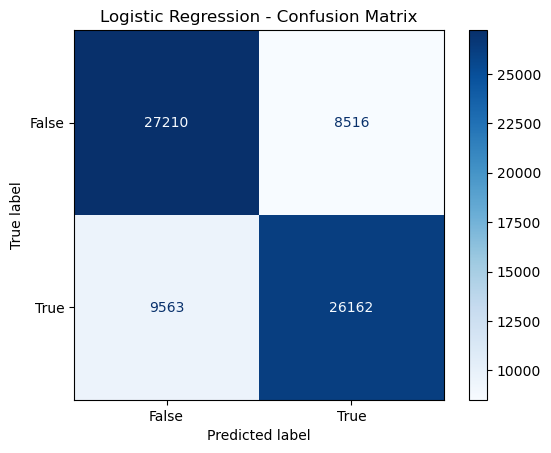

In [176]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

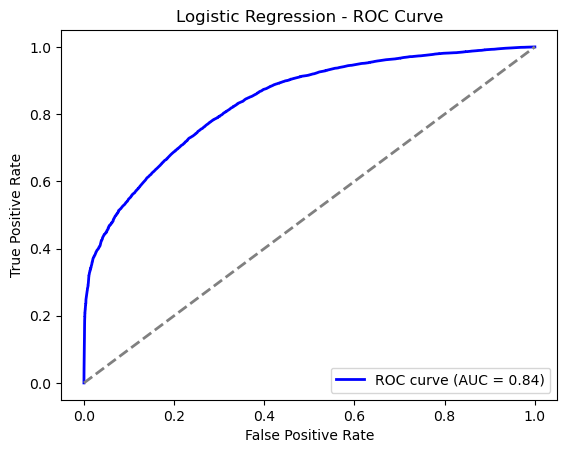

In [177]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [178]:
# Classification Report
print(classification_report(y_test, y_pred))

# Logistic Regression metrics
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
accuracy_lr = np.mean([report_lr["False"]["precision"], report_lr["True"]["precision"]])
precision_lr = report_lr["weighted avg"]["precision"]
recall_lr = report_lr["weighted avg"]["recall"]
f1_lr = report_lr["weighted avg"]["f1-score"]

              precision    recall  f1-score   support

       False       0.74      0.76      0.75     35726
        True       0.75      0.73      0.74     35725

    accuracy                           0.75     71451
   macro avg       0.75      0.75      0.75     71451
weighted avg       0.75      0.75      0.75     71451



## Random Forest

In [180]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [181]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy_rf}")

Model Accuracy: 0.7469734503365943


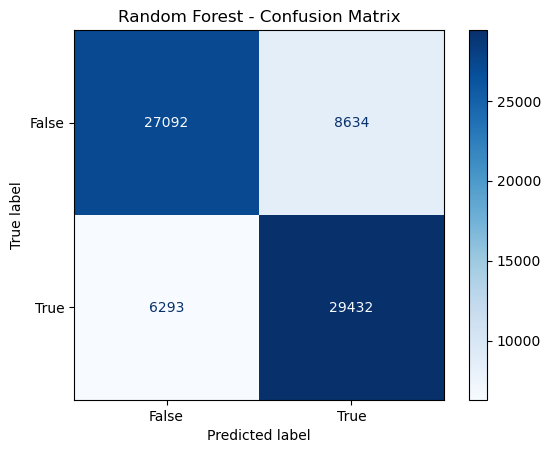

In [182]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

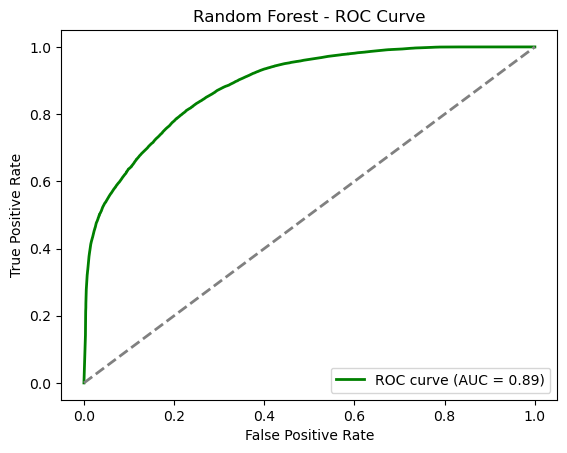

In [183]:
# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [184]:
# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Random Forest metrics
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
accuracy_rf = np.mean([report_rf["False"]["precision"], report_rf["True"]["precision"]])
precision_rf = report_rf["weighted avg"]["precision"]
recall_rf = report_rf["weighted avg"]["recall"]
f1_rf = report_rf["weighted avg"]["f1-score"]

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.76      0.78     35726
        True       0.77      0.82      0.80     35725

    accuracy                           0.79     71451
   macro avg       0.79      0.79      0.79     71451
weighted avg       0.79      0.79      0.79     71451



## Neural Network (MLP Classifier)

In [186]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
# Train Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(200,),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=500,
    batch_size=512,
    early_stopping=True,
    validation_fraction=0.1
)
nn_model.fit(X_train, y_train)


MLPClassifier(batch_size=512, early_stopping=True, hidden_layer_sizes=(200,),
              max_iter=500, random_state=42)

In [187]:
# Predictions
y_pred_nn = nn_model.predict(X_test)
y_prob_nn = nn_model.predict_proba(X_test)[:, 1]

accuracy_nn = accuracy_score(y_test, y_pred)


print(f"Model Accuracy: {accuracy_nn}")

Model Accuracy: 0.7469734503365943


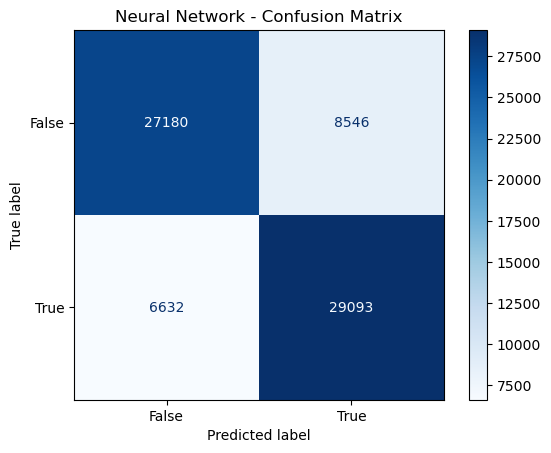

In [188]:
# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn, display_labels=nn_model.classes_)
disp_nn.plot(cmap='Blues')
plt.title("Neural Network - Confusion Matrix")
plt.show()


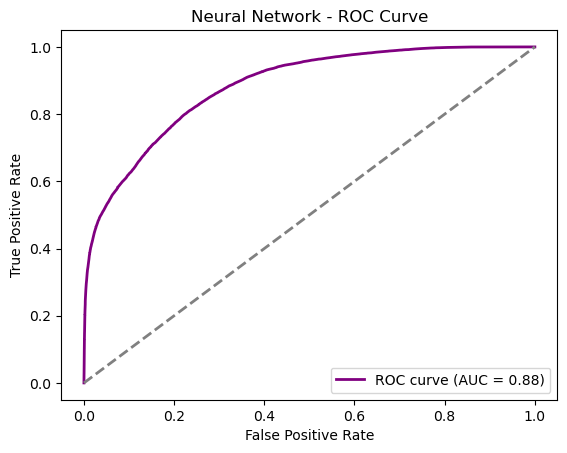

In [189]:
# ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure()
plt.plot(fpr_nn, tpr_nn, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network - ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [190]:
# Classification Report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


# Neural Network metrics
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)
accuracy_nn = np.mean([report_nn["False"]["precision"], report_nn["True"]["precision"]])
precision_nn = report_nn["weighted avg"]["precision"]
recall_nn = report_nn["weighted avg"]["recall"]
f1_nn = report_nn["weighted avg"]["f1-score"]

Neural Network Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.76      0.78     35726
        True       0.77      0.81      0.79     35725

    accuracy                           0.79     71451
   macro avg       0.79      0.79      0.79     71451
weighted avg       0.79      0.79      0.79     71451



# Comparing the Accuracy of all 3 Models

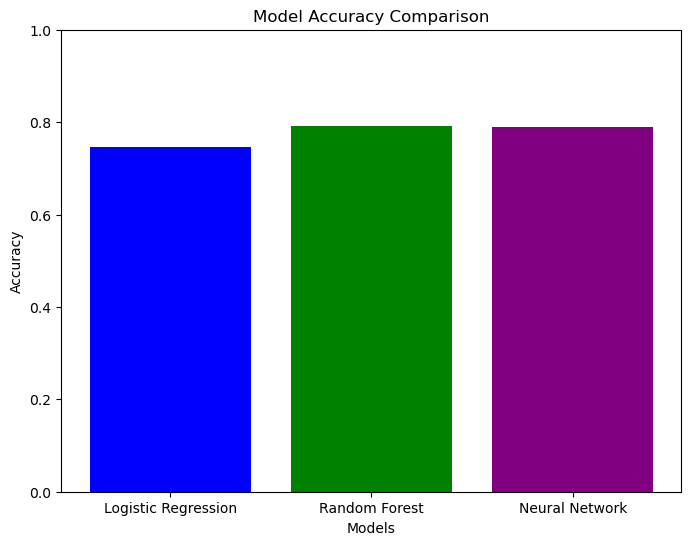

In [192]:
import matplotlib.pyplot as plt

# Data for visualization
models = ["Logistic Regression", "Random Forest", "Neural Network"]
accuracy = [accuracy_lr, accuracy_rf, accuracy_nn]

# Bar plot for accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=["blue", "green", "purple"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Radar Chart

## Comparing the Overall Performance by Analyzing Accuracy, Recall, F1 & Precision of all 3 Models

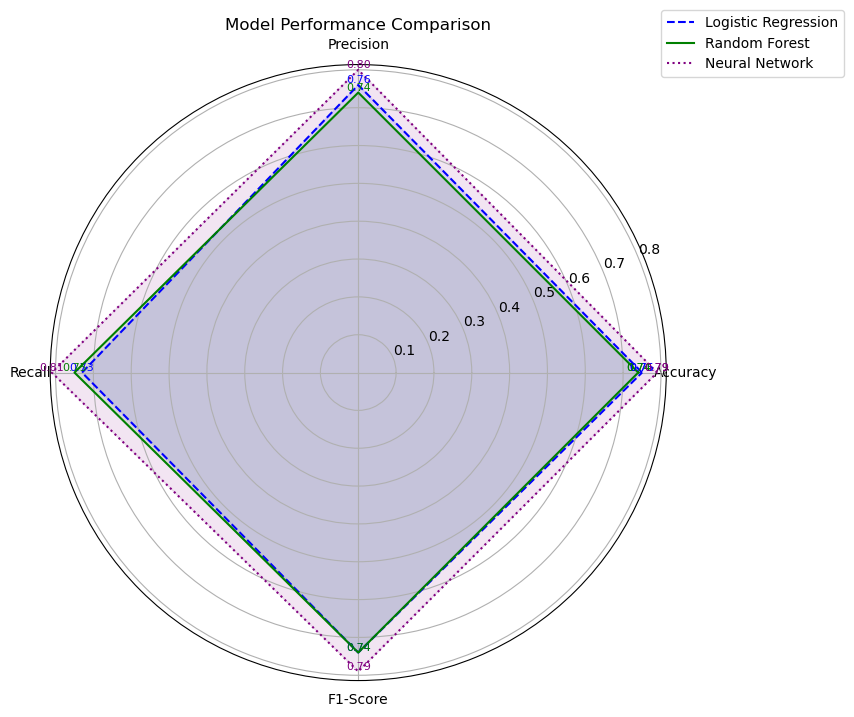

In [195]:
from math import pi
import matplotlib.pyplot as plt

# Define metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Close the loop for metrics
metrics += metrics[:1]

# Calculate angles
angles = [n / float(len(metrics) - 1) * 2 * pi for n in range(len(metrics))]

# Define model performance data
logistic = [0.75, 0.76, 0.73, 0.74]  # Logistic Regression
random_forest = [0.74, 0.74, 0.75, 0.74]  # Random Forest
neural_network = [0.79, 0.80, 0.81, 0.79]  # Neural Network

# Close the loop for performance data
logistic += logistic[:1]
random_forest += random_forest[:1]
neural_network += neural_network[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot and fill each model
ax.plot(angles, logistic, label="Logistic Regression", color="blue", linestyle='dashed')
ax.fill(angles, logistic, color="blue", alpha=0.1)

ax.plot(angles, random_forest, label="Random Forest", color="green", linestyle='solid')
ax.fill(angles, random_forest, color="green", alpha=0.1)

ax.plot(angles, neural_network, label="Neural Network", color="purple", linestyle='dotted')
ax.fill(angles, neural_network, color="purple", alpha=0.1)

# Add metric values as labels
for angle, log, rf, nn in zip(angles, logistic, random_forest, neural_network):
    ax.text(angle, log, f'{log:.2f}', ha='center', va='bottom', color="blue", fontsize=8)
    ax.text(angle, rf, f'{rf:.2f}', ha='center', va='bottom', color="green", fontsize=8)
    ax.text(angle, nn, f'{nn:.2f}', ha='center', va='bottom', color="purple", fontsize=8)

# Customize chart
ax.set_xticks(angles[:-1])  # Correct labels for metrics
ax.set_xticklabels(metrics[:-1])
plt.title("Model Performance Comparison")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()



## Best Model: Neural Network
The Neural Network is the best-performing model for this analysis because:

- Superior Metrics: It has the highest values for Accuracy, Precision, Recall, and F1-Score.
- Balanced Performance: It achieves a good balance between minimizing false positives (high precision) and capturing true positives (high recall), reflected in its strong F1-Score.
- Generalized Performance: It demonstrates the ability to generalize better across the dataset compared to Logistic Regression and Random Forest.

# Conclusion:
- Our analysis highlighted the importance of predictive analytics in improving arrest likelihood predictions, guided by factors such as crime type, location, and time, which were critical in enhancing model performance.
- Crime type provided insight into the nature and severity of incidents, location helped identify high-risk areas where law enforcement resources could be better concentrated, and time revealed patterns that allowed for optimized scheduling of patrols.
- Advanced models like Neural Networks effectively captured these relationships, offering insights for smarter resource allocation and proactive policing strategies.
- These insights not only improve arrest predictions but also provide a practical way for law enforcement to make data-driven decisions that enhance public safety.
- Moving forward, refining the model with additional data, focusing on specific crime categories, and collaborating with police departments will help integrate these tools into real-world applications, creating safer and more secure communities.